# PWSkills EDA Assignments
## Solutions for EDA 1, 2, 3, and 4


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# EDA 1: Bike Details Dataset


In [6]:
# Load Dataset
df_bike = pd.read_csv('BIKE DETAILS.csv')
df_bike.head()


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


**Q1.1: What is the range of selling prices in the dataset?**


In [8]:
price_range = df_bike['selling_price'].max() - df_bike['selling_price'].min()
print(f'Range: {price_range}')


Range: 755000


**Q1.2: What is the median selling price for bikes in the dataset?**


In [10]:
print(f"Median Selling Price: {df_bike['selling_price'].median()}")


Median Selling Price: 45000.0


**Q1.3: What is the most common seller type?**


In [12]:
print(f"Most Common Seller Type: {df_bike['seller_type'].mode()[0]}")


Most Common Seller Type: Individual


**Q1.4: How many bikes have driven more than 50,000 kilometers?**


In [14]:
print(f"Bikes driven > 50k km: {df_bike[df_bike['km_driven'] > 50000].shape[0]}")


Bikes driven > 50k km: 170


**Q1.5: What is the average km_driven value for each ownership type?**


In [16]:
print(df_bike.groupby('owner')['km_driven'].mean())


owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


**Q1.6: What proportion of bikes are from the year 2015 or older?**


In [18]:
prop = df_bike[df_bike['year'] <= 2015].shape[0] / df_bike.shape[0]
print(f'Proportion <= 2015: {prop:.2%}')


Proportion <= 2015: 56.64%


**Q1.7: What is the trend of missing values across the dataset?**


In [20]:
print(df_bike.isnull().sum())


name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


**Q1.8: What is the highest ex_showroom_price recorded, and for which bike?**


In [22]:
if 'ex_showroom_price' in df_bike.columns:
    idx = df_bike['ex_showroom_price'].idxmax()
    print(df_bike.loc[idx, ['name', 'ex_showroom_price']])


name                 Harley-Davidson Street Bob
ex_showroom_price                     1278000.0
Name: 134, dtype: object


**Q1.9: What is the total number of bikes listed by each seller type?**


In [24]:
print(df_bike['seller_type'].value_counts())


seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


**Q1.10: What is the relationship between selling_price and km_driven for first-owner bikes?**


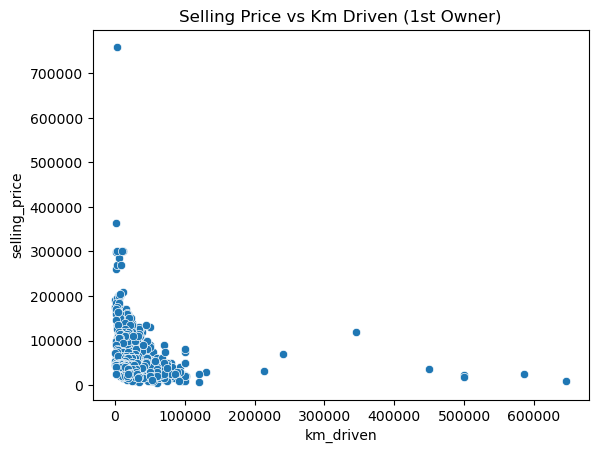

In [26]:
subset = df_bike[df_bike['owner'] == '1st owner']
sns.scatterplot(data=subset, x='km_driven', y='selling_price')
plt.title('Selling Price vs Km Driven (1st Owner)')
plt.show()


**Q1.11: Identify and remove outliers in the km_driven column using the IQR method.**


In [28]:
Q1 = df_bike['km_driven'].quantile(0.25)
Q3 = df_bike['km_driven'].quantile(0.75)
IQR = Q3 - Q1
df_bike_clean = df_bike[~((df_bike['km_driven'] < (Q1 - 1.5 * IQR)) | (df_bike['km_driven'] > (Q3 + 1.5 * IQR)))]
print(f'Original shape: {df_bike.shape}, Cleaned shape: {df_bike_clean.shape}')


Original shape: (1061, 7), Cleaned shape: (1022, 7)


**Q1.12: Perform a bivariate analysis to visualize the relationship between year and selling_price.**


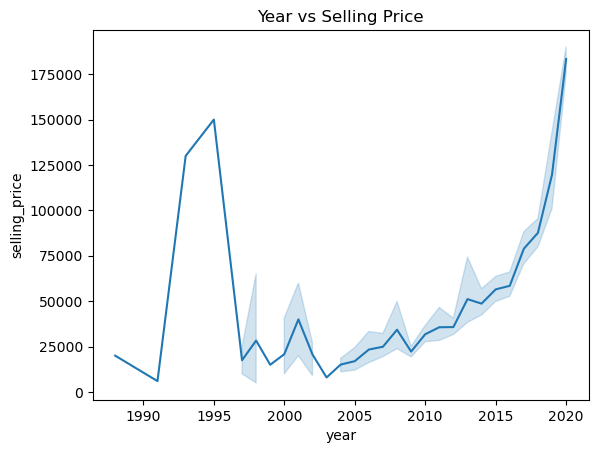

In [30]:
sns.lineplot(data=df_bike, x='year', y='selling_price')
plt.title('Year vs Selling Price')
plt.show()


**Q1.13: What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?**


In [32]:
df_bike['age'] = 2024 - df_bike['year']
# Proxy for depreciation: Avg price by age
print(df_bike.groupby('age')['selling_price'].mean())


age
4     183333.333333
5     119689.511628
6      87660.374046
7      78894.736842
8      58469.018692
9      56500.000000
10     48668.131868
11     51136.986301
12     35748.400000
13     35655.721311
14     31793.333333
15     22267.857143
16     34289.285714
17     24927.586207
18     23380.000000
19     16978.571429
20     15100.000000
21      8000.000000
22     20666.666667
23     40000.000000
24     20833.333333
25     15000.000000
26     28333.333333
27     17500.000000
29    150000.000000
31    130000.000000
33      6000.000000
36     20000.000000
Name: selling_price, dtype: float64


**Q1.14: Which bike names are priced significantly above the average price for their manufacturing year?**


In [34]:
significant_bikes = []
for year, group in df_bike.groupby('year'):
    mean = group['selling_price'].mean()
    std = group['selling_price'].std()
    if pd.notna(std):
        significant_bikes.append(group[group['selling_price'] > (mean + 2*std)])
if significant_bikes:
    print(pd.concat(significant_bikes)[['name', 'year', 'selling_price']].head())


                                     name  year  selling_price
306                             Yamaha Rx  2000          70000
889         Royal Enfield Thunderbird 350  2005          59000
776             Royal Enfield Electra 5 S  2006          99000
224  Royal Enfield Bullet 350 [2007-2011]  2007          90000
7    Royal Enfield Bullet 350 [2007-2011]  2008         180000


**Q1.15: Develop a correlation matrix for numeric columns and visualize it using a heatmap.**


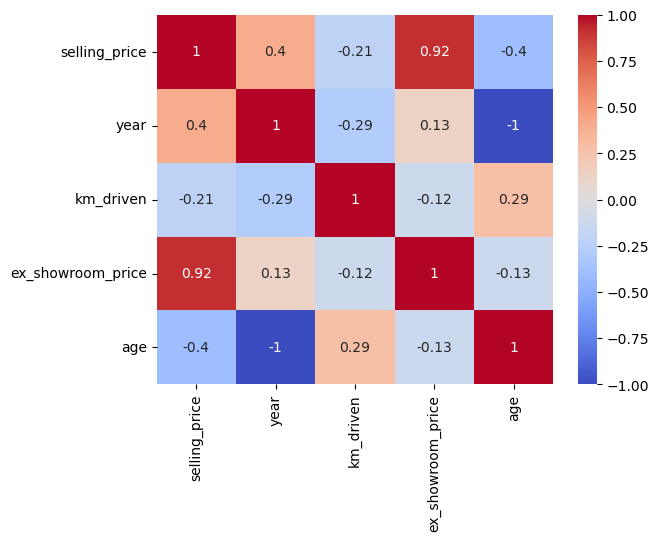

In [36]:
sns.heatmap(df_bike.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.show()


# EDA 2: Car Sale Dataset


In [38]:
# Load and clean data
df_car = pd.read_csv('Car Sale.csv')
# Fix Date
df_car['Date'] = pd.to_datetime(df_car['Date'], errors='coerce')
# Rename Price column if needed
price_col = [c for c in df_car.columns if 'Price' in c][0]
df_car.rename(columns={price_col: 'Price'}, inplace=True)
df_car.head()


,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price,Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,2022-01-02,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,2022-01-02,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,2022-01-02,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,2022-01-02,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,2022-01-02,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


**Q2.1: What is the average selling price of cars for each dealer, and how does it compare across different dealers?**


In [40]:
print(df_car.groupby('Dealer_Name')['Price'].mean().sort_values(ascending=False).head())


Dealer_Name
U-Haul CO                28769.919006
Classic Chevy            28602.014446
Rabun Used Car Sales     28527.536177
Iceberg Rentals          28522.958533
Enterprise Rent A Car    28312.580800
Name: Price, dtype: float64


**Q2.2: Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?**


In [42]:
std_dev = df_car.groupby('Company')['Price'].std().sort_values(ascending=False)
print(f'Highest Variation: {std_dev.index[0]} (Std: {std_dev.iloc[0]:.2f})')


Highest Variation: Lincoln (Std: 19658.05)


**Q2.3: What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?**


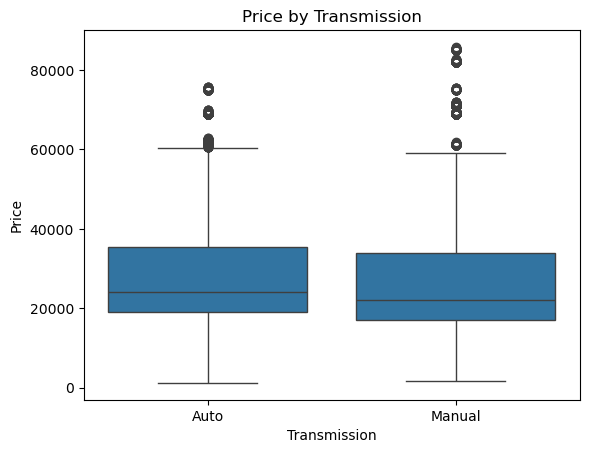

In [44]:
sns.boxplot(data=df_car, x='Transmission', y='Price')
plt.title('Price by Transmission')
plt.show()


**Q2.4: What is the distribution of car prices across different regions?**


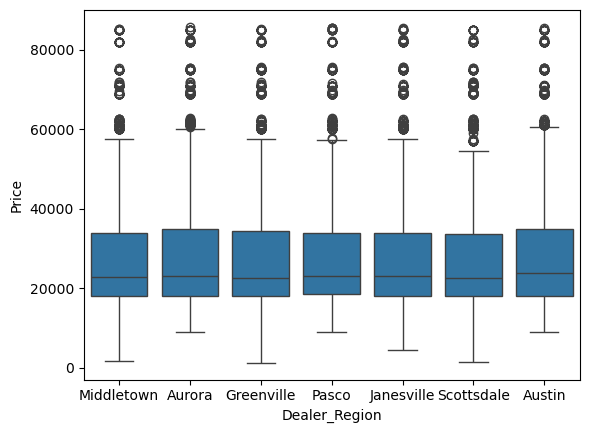

In [46]:
sns.boxplot(data=df_car, x='Dealer_Region', y='Price')
plt.show()


**Q2.5: What is the distribution of cars based on body styles?**


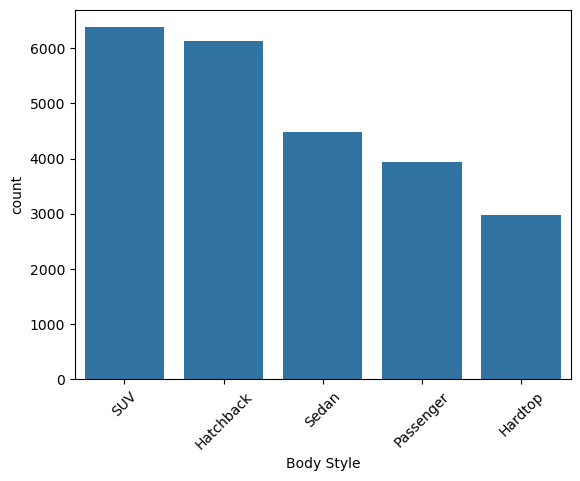

In [48]:
sns.countplot(data=df_car, x='Body Style', order=df_car['Body Style'].value_counts().index)
plt.xticks(rotation=45)
plt.show()


**Q2.6: How does the average selling price of cars vary by customer gender and annual income?**


In [50]:
print(df_car.groupby('Gender')['Price'].mean())


Gender
Female    28277.265270
Male      28039.429407
Name: Price, dtype: float64


**Q2.7: What is the distribution of car prices by region, and how does the number of cars sold vary by region?**


In [52]:
region_stats = df_car.groupby('Dealer_Region').agg({'Price': 'mean', 'Car_id': 'count'})
print(region_stats)


                      Price  Car_id
Dealer_Region                      
Aurora         28334.626837    3130
Austin         28341.603628    4135
Greenville     28180.819054    3128
Janesville     27833.350955    3821
Middletown     27856.338875    3128
Pasco          28119.039923    3131
Scottsdale     27954.958928    3433


**Q2.8: How does the average car price differ between cars with different engine sizes?**


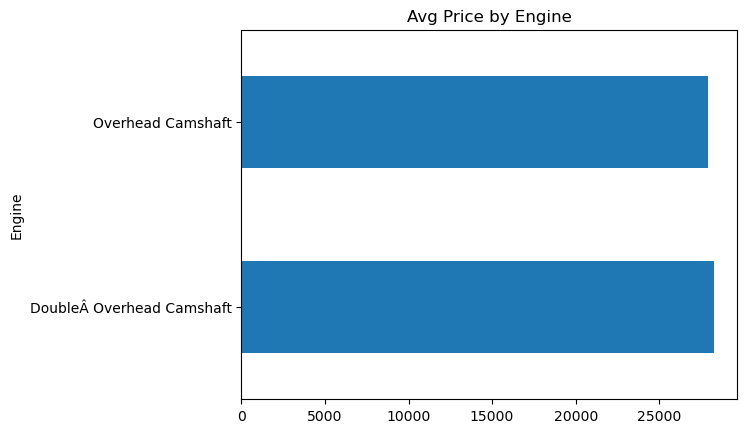

In [54]:
df_car.groupby('Engine')['Price'].mean().plot(kind='barh')
plt.title('Avg Price by Engine')
plt.show()


**Q2.9: How do car prices vary based on the customer’s annual income bracket?**


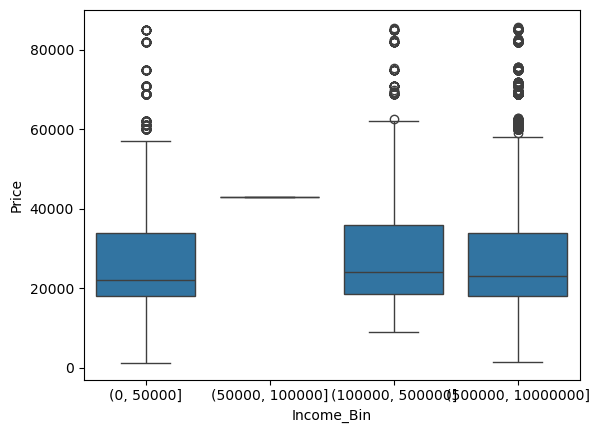

In [56]:
df_car['Income_Bin'] = pd.cut(df_car['Annual Income'], bins=[0, 50000, 100000, 500000, 10000000])
sns.boxplot(data=df_car, x='Income_Bin', y='Price')
plt.show()


**Q2.10: What are the top 5 car models with the highest number of sales, and how does their price distribution look?**


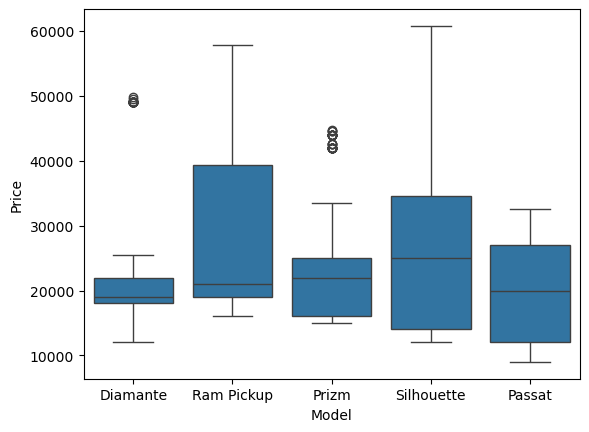

In [58]:
top_models = df_car['Model'].value_counts().head(5).index
sns.boxplot(data=df_car[df_car['Model'].isin(top_models)], x='Model', y='Price')
plt.show()


**Q2.11: How does car price vary with engine size across different car colors, and which colors have the highest price variation?**


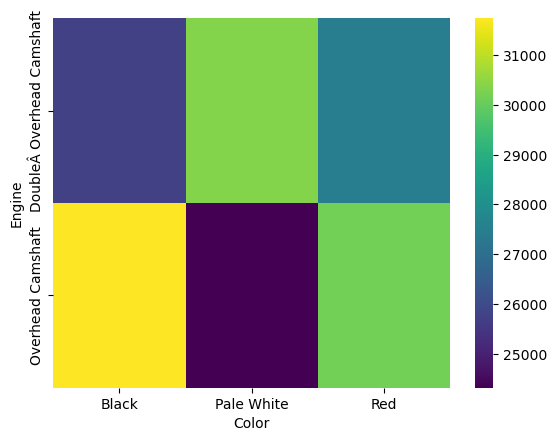

In [60]:
pivot = df_car.pivot_table(index='Engine', columns='Color', values='Price', aggfunc='mean')
sns.heatmap(pivot, cmap='viridis')
plt.show()


**Q2.12: Is there any seasonal trend in car sales based on the date of sale?**


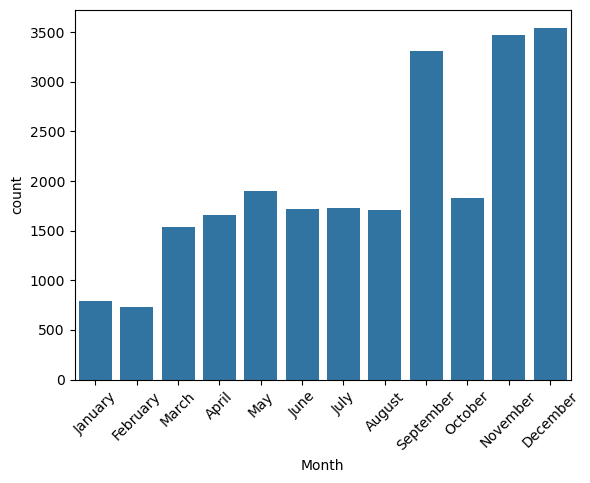

In [62]:
df_car['Month'] = df_car['Date'].dt.month_name()
sns.countplot(data=df_car, x='Month', order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.xticks(rotation=45)
plt.show()


**Q2.13: How does the car price distribution change when considering different combinations of body style and transmission type?**


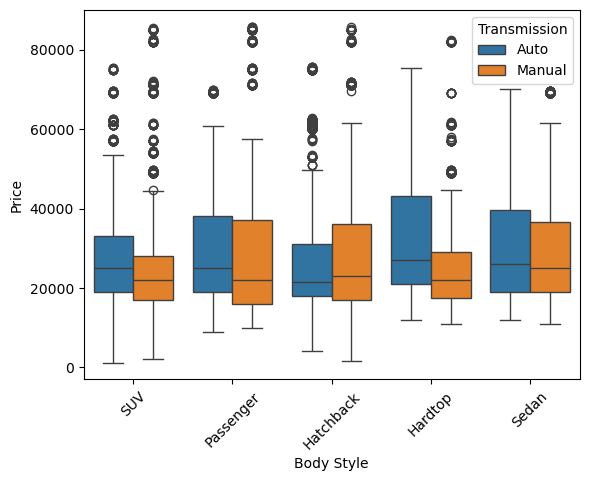

In [64]:
sns.boxplot(data=df_car, x='Body Style', y='Price', hue='Transmission')
plt.xticks(rotation=45)
plt.show()


**Q2.14: What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?**


In [66]:
print(df_car[['Price', 'Annual Income']].corr())


                  Price  Annual Income
Price          1.000000       0.012065
Annual Income  0.012065       1.000000


**Q2.15: How does the average car price vary across different car models and engine types?**


In [68]:
print(df_car[df_car['Model'].isin(top_models)].pivot_table(index='Model', columns='Engine', values='Price', aggfunc='mean'))


Engine      DoubleÂ Overhead Camshaft  Overhead Camshaft
Model                                                   
Diamante                 19253.146341       25170.215962
Passat                   19730.953846       19342.267176
Prizm                    23588.941558       22388.750973
Ram Pickup               47163.833333       19623.472119
Silhouette               42558.078431       22327.375969


# EDA 3: Amazon Sales Data


In [70]:
# Load and clean data
df_amazon = pd.read_csv('amazon.csv')

def clean_currency(x):
    if isinstance(x, str):
        return float(x.replace('₹', '').replace(',', '').strip())
    return x

df_amazon['discounted_price'] = df_amazon['discounted_price'].apply(clean_currency)
df_amazon['actual_price'] = df_amazon['actual_price'].apply(clean_currency)
df_amazon['rating'] = pd.to_numeric(df_amazon['rating'], errors='coerce')
df_amazon['rating_count'] = df_amazon['rating_count'].astype(str).str.replace(',', '').apply(pd.to_numeric, errors='coerce')
df_amazon['discount_percentage'] = df_amazon['discount_percentage'].astype(str).str.replace('%', '').astype(float) / 100
df_amazon['Main_Category'] = df_amazon['category'].astype(str).apply(lambda x: x.split('|')[0])
df_amazon.head()


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,Main_Category
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,0.64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Computers&Accessories
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,0.43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Computers&Accessories
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,0.90,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,Computers&Accessories
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,0.53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,Computers&Accessories
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,0.61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,Computers&Accessories


**Q3.1: What is the average rating for each product category?**


In [72]:
print(df_amazon.groupby('Main_Category')['rating'].mean().sort_values(ascending=False))


Main_Category
OfficeProducts           4.309677
Toys&Games               4.300000
HomeImprovement          4.250000
Computers&Accessories    4.154967
Electronics              4.081749
Home&Kitchen             4.040716
Health&PersonalCare      4.000000
MusicalInstruments       3.900000
Car&Motorbike            3.800000
Name: rating, dtype: float64


**Q3.2: What are the top rating_count products by category?**


In [74]:
idx = df_amazon.groupby('Main_Category')['rating_count'].idxmax()
print(df_amazon.loc[idx, ['Main_Category', 'product_name', 'rating_count']])


              Main_Category  \
1157          Car&Motorbike   
588   Computers&Accessories   
12              Electronics   
1247    Health&PersonalCare   
1028           Home&Kitchen   
982         HomeImprovement   
613      MusicalInstruments   
659          OfficeProducts   
924              Toys&Games   

                                           product_name  rating_count  
1157  Reffair AX30 [MAX] Portable Air Purifier for C...        1118.0  
588           SanDisk Cruzer Blade 32GB USB Flash Drive      253105.0  
12    AmazonBasics Flexible Premium HDMI Cable (Blac...      426973.0  
1247  Dr Trust Electronic Kitchen Digital Scale Weig...        3663.0  
1028  Pigeon Polypropylene Mini Handy and Compact Ch...      270563.0  
982   Gizga Essentials Cable Organiser, Cord Managem...        5985.0  
613   Boya ByM1 Auxiliary Omnidirectional Lavalier C...       68664.0  
659   Casio FX-82MS 2nd Gen Non-Programmable Scienti...       12179.0  
924   Faber-Castell Connector Pen Set - P

**Q3.3: What is the distribution of discounted prices vs. actual prices?**


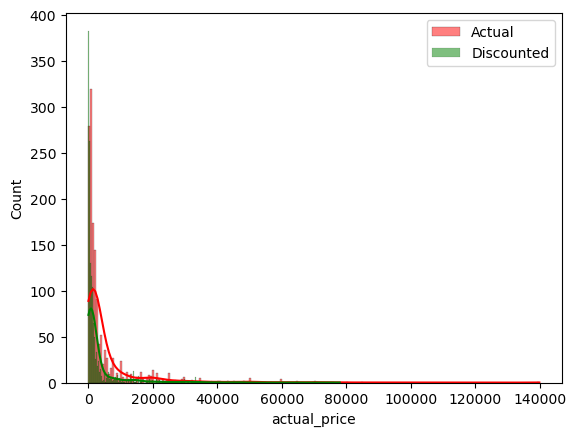

In [76]:
sns.histplot(df_amazon['actual_price'], color='red', label='Actual', kde=True)
sns.histplot(df_amazon['discounted_price'], color='green', label='Discounted', kde=True)
plt.legend()
plt.show()


**Q3.4: How does the average discount percentage vary across categories?**


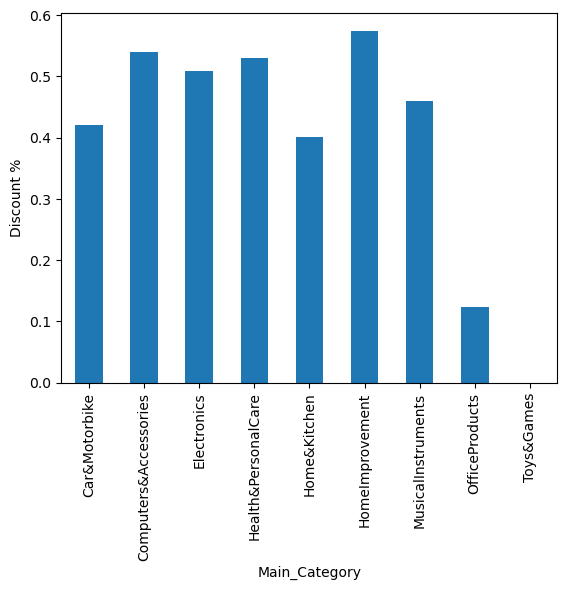

In [78]:
df_amazon.groupby('Main_Category')['discount_percentage'].mean().plot(kind='bar')
plt.ylabel('Discount %')
plt.show()


**Q3.5: What are the most popular product names?**


In [80]:
print(df_amazon.sort_values('rating_count', ascending=False)['product_name'].head())


12     AmazonBasics Flexible Premium HDMI Cable (Blac...
65     Amazon Basics High-Speed HDMI Cable, 6 Feet (2...
47     Amazon Basics High-Speed HDMI Cable, 6 Feet - ...
684    AmazonBasics Flexible Premium HDMI Cable (Blac...
400    boAt Bassheads 100 in Ear Wired Earphones with...
Name: product_name, dtype: object


**Q3.6: What are the most popular product keywords?**


In [82]:
from collections import Counter
words = ' '.join(df_amazon['product_name'].dropna()).lower().split()
counts = Counter([w for w in words if len(w)>3])
print(counts.most_common(10))


[('with', 751), ('cable', 320), ('charging', 219), ('fast', 211), ('(black)', 187), ('smart', 171), ('type', 144), ('compatible', 138), ('data', 131), ('wireless', 114)]


**Q3.7: What are the most popular product reviews?**


In [84]:
print(df_amazon.sort_values('rating_count', ascending=False)[['product_name', 'review_title']].head())


                                          product_name  \
12   AmazonBasics Flexible Premium HDMI Cable (Blac...   
65   Amazon Basics High-Speed HDMI Cable, 6 Feet (2...   
47   Amazon Basics High-Speed HDMI Cable, 6 Feet - ...   
684  AmazonBasics Flexible Premium HDMI Cable (Blac...   
400  boAt Bassheads 100 in Ear Wired Earphones with...   

                                          review_title  
12   It's quite good and value for money,Works well...  
65   It's quite good and value for money,Works well...  
47   It's quite good and value for money,Works well...  
684  It's quite good and value for money,Works well...  
400  Best value for money,HEAD PHONE POUCH NOT RECE...  


**Q3.8: What is the correlation between discounted_price and rating?**


In [86]:
print(df_amazon[['discounted_price', 'rating']].corr())


                  discounted_price    rating
discounted_price          1.000000  0.120337
rating                    0.120337  1.000000


**Q3.9: What are the Top 5 categories based on the highest ratings?**


In [88]:
print(df_amazon.groupby('Main_Category')['rating'].mean().sort_values(ascending=False).head(5))


Main_Category
OfficeProducts           4.309677
Toys&Games               4.300000
HomeImprovement          4.250000
Computers&Accessories    4.154967
Electronics              4.081749
Name: rating, dtype: float64


**Q3.10: Identify any potential areas for improvement or optimization based on the data analysis.**


In [90]:
# Categories with low ratings but high prices?
print(df_amazon.groupby('Main_Category')[['rating', 'actual_price']].mean().sort_values('rating').head())


                       rating  actual_price
Main_Category                              
Car&Motorbike        3.800000   4000.000000
MusicalInstruments   3.900000   1347.000000
Health&PersonalCare  4.000000   1900.000000
Home&Kitchen         4.040716   4162.073661
Electronics          4.081749  10127.311787


# EDA 4: Spotify Data


In [92]:
df_spotify = pd.read_csv('spotify.csv')
df_spotify.head()


,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


**Q4.1: Read the dataframe, check null value if present then do the needful, check duplicate row, if present then do the needful**


In [94]:
print('Nulls:', df_spotify.isnull().sum())
print('Duplicates:', df_spotify.duplicated().sum())
df_spotify.drop_duplicates(inplace=True)


Nulls: Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
Duplicates: 27


**Q4.2: What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram**


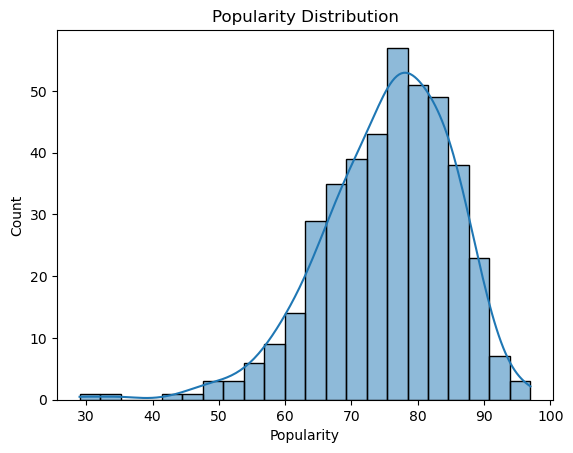

In [96]:
sns.histplot(df_spotify['Popularity'], kde=True)
plt.title('Popularity Distribution')
plt.show()


**Q4.3: Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot**


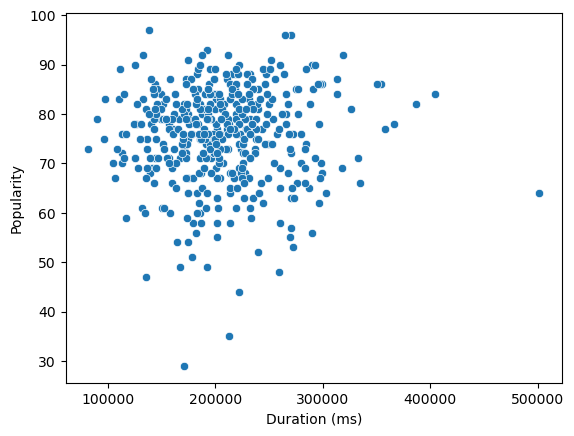

In [98]:
sns.scatterplot(data=df_spotify, x='Duration (ms)', y='Popularity')
plt.show()


**Q4.4: Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot**


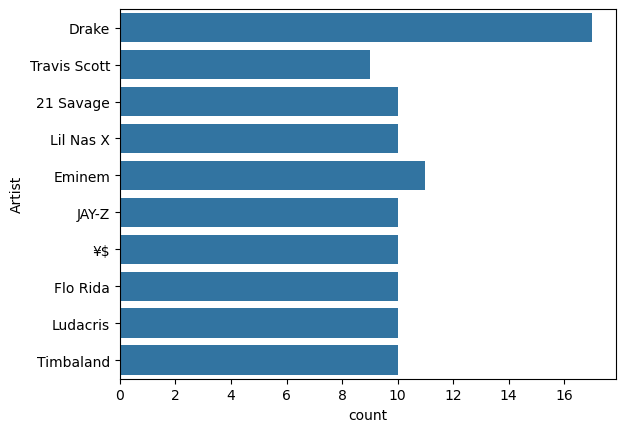

In [100]:
top_artists = df_spotify['Artist'].value_counts().head(10).index
sns.countplot(data=df_spotify[df_spotify['Artist'].isin(top_artists)], y='Artist')
plt.show()


**Q4.5: What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each**


In [102]:
print(df_spotify.sort_values('Popularity').head(5)[['Artist', 'Track Name', 'Popularity']])


             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


**Q4.6: Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist**


In [104]:
top_5 = df_spotify['Artist'].value_counts().head(5).index
print(df_spotify[df_spotify['Artist'].isin(top_5)].groupby('Artist')['Popularity'].mean().sort_values(ascending=False))


Artist
Eminem       83.636364
Drake        82.882353
Flo Rida     78.000000
Timbaland    69.000000
Ludacris     63.000000
Name: Popularity, dtype: float64


**Q4.7: For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist**


In [106]:
for artist in top_5:
    print(f'{artist}:', df_spotify[df_spotify['Artist']==artist].sort_values('Popularity', ascending=False)['Track Name'].iloc[0])


Drake: Rich Baby Daddy (feat. Sexyy Red & SZA)
Eminem: Without Me
Flo Rida: Low (feat. T-Pain)
Ludacris: My Chick Bad
Timbaland: The Way I Are


**Q4.8: Visualize relationships between multiple numerical variables simultaneously using a pair plot**


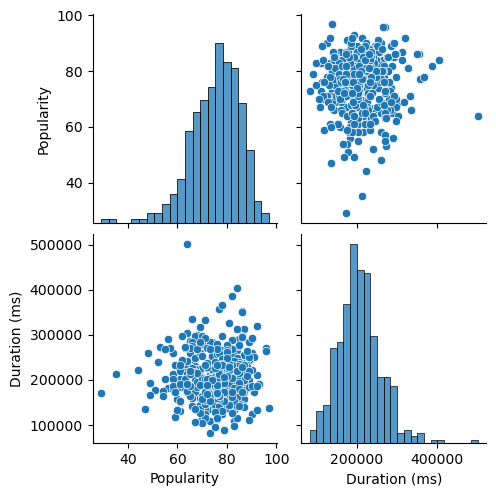

In [108]:
sns.pairplot(df_spotify[['Popularity', 'Duration (ms)']])
plt.show()


**Q4.9: Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot**


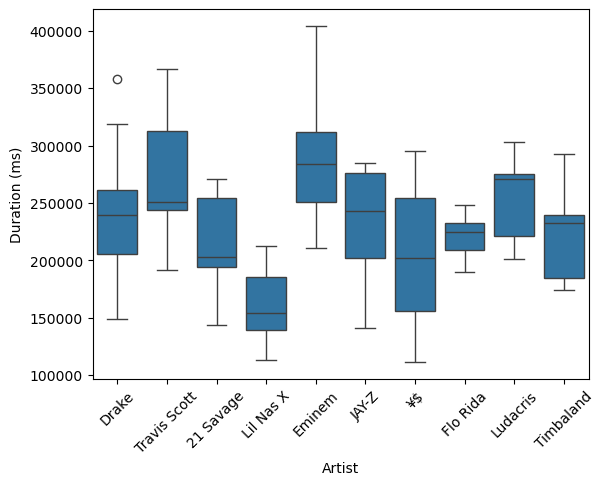

In [110]:
sns.boxplot(data=df_spotify[df_spotify['Artist'].isin(top_artists)], x='Artist', y='Duration (ms)')
plt.xticks(rotation=45)
plt.show()


**Q4.10: How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.**


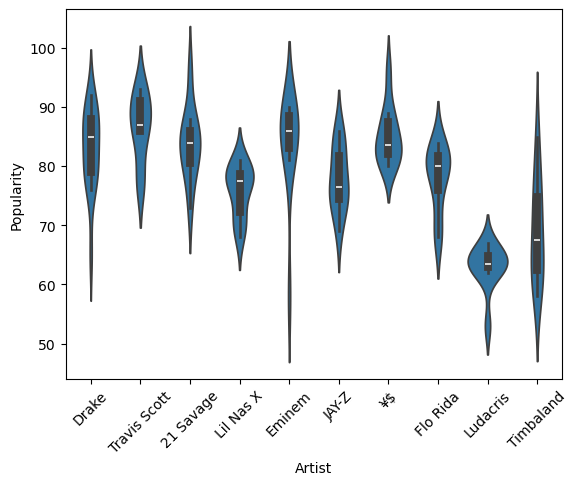

In [112]:
sns.violinplot(data=df_spotify[df_spotify['Artist'].isin(top_artists)], x='Artist', y='Popularity')
plt.xticks(rotation=45)
plt.show()
